In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_data = pd.read_csv("sales.csv")

print(customer_data.head())

   Unnamed: 0  store_ID  day_of_week        date  nb_customers_on_day  open  \
0      425390       366            4  2013-04-18                  517     1   
1      291687       394            6  2015-04-11                  694     1   
2      411278       807            4  2013-08-29                  970     1   
3      664714       802            2  2013-05-28                  473     1   
4      540835       726            4  2013-10-10                 1068     1   

   promotion state_holiday  school_holiday  sales  
0          0             0               0   4422  
1          0             0               0   8297  
2          1             0               0   9729  
3          1             0               0   6513  
4          1             0               0  10882  


In [3]:
# Data stats
print("Data stats")
print("Shape of the data: ", customer_data.shape)
print("data types = ", customer_data.dtypes)
print(customer_data.describe())

# Missing values check
print("Missing values")
missing_info = pd.DataFrame({
    "has_missing": customer_data.isna().any(),
    "missing_count": customer_data.isna().sum(),
    "missing_pct": (customer_data.isna().sum() / len(customer_data) * 100).round(2)
})
missing_info = missing_info[missing_info["has_missing"]]
print(missing_info)
cols_with_na = missing_info.index.tolist()




Data stats
Shape of the data:  (640840, 10)
data types =  Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object
          Unnamed: 0       store_ID    day_of_week  nb_customers_on_day  \
count  640840.000000  640840.000000  640840.000000        640840.000000   
mean   355990.675084     558.211348       4.000189           633.398577   
std    205536.290268     321.878521       1.996478           464.094416   
min         0.000000       1.000000       1.000000             0.000000   
25%    178075.750000     280.000000       2.000000           405.000000   
50%    355948.500000     558.000000       4.000000           609.000000   
75%    533959.250000     837.000000       6.000000           838.000000   
max    712044.000000    1115

In [4]:
print("Data Cleaning : ")
#1.Checking state-holiday values and conert to categorical
print("1. Checking state-holiday values and conert to categorical")
print(f"{customer_data["state_holiday"].unique()} original")
sh_dict = {'0': 0, 'a': 1, 'b': 2, 'c': 3}
customer_data["state_holiday"] = customer_data["state_holiday"].map(sh_dict)
print(f"{customer_data["state_holiday"].unique()} categorized")


#2. Clean up and type-casting
#Drop the redundant index column, 'The Unnamed: 0' column appears to be just the original row index. You can safely drop it:
print("2. Drop the redundant index column, 'The Unnamed: 0' column appears to be just the original row index. You can safely drop it:")
customer_data = customer_data.drop(columns='Unnamed: 0')

#Convert date to datetime
#convert it so you can extract time-based features and do time‐series plots:
print("3 .convert it so you can extract time-based features and do time‐series plots")
customer_data['date'] = pd.to_datetime(customer_data['date'])

#3. Time Feature engineering
#Once your date is a datetime, creating new features that will help boost model performance or reveal patterns in EDA:
print("3. Feature engineering")
print("Temporal features : Transform date as a python datetime, then creating new features that will help boost model performance or reveal patterns in EDA:")

customer_data['year']   = customer_data['date'].dt.year
#customer_data['month']  = customer_data['date'].dt.month     # Data exploration show us that dow and month are highly correlated so we don't need to create column month 
customer_data['dow']    = customer_data['date'].dt.dayofweek  # Monday=0 … Sunday=6
customer_data['weekofyear'] = customer_data['date'].dt.isocalendar().week

customer_data = customer_data.drop(['date'], axis=1)

#4. Promotional lag features
#Capture whether a store was on promotion in the last 7 days, or count how many promo days in the past month.

print("4. Promotional lag features")
print("Creating a column 'promo_7d' to capture whether a store was on promotion in the last 7 days, or count how many promo days in the past month.")

customer_data = customer_data.sort_values(['store_ID','dow'])
customer_data['promo_7d'] = (customer_data
    .groupby('store_ID')['promotion']
    .rolling(window=7, min_periods=1).sum()
    .reset_index(0,drop=True))

Data Cleaning : 
1. Checking state-holiday values and conert to categorical
['0' 'a' 'c' 'b'] original
[0 1 3 2] categorized
2. Drop the redundant index column, 'The Unnamed: 0' column appears to be just the original row index. You can safely drop it:
3 .convert it so you can extract time-based features and do time‐series plots
3. Feature engineering
Temporal features : Transform date as a python datetime, then creating new features that will help boost model performance or reveal patterns in EDA:
4. Promotional lag features
Creating a column 'promo_7d' to capture whether a store was on promotion in the last 7 days, or count how many promo days in the past month.


In [5]:
print("Checking data stats again... \n")
# Data stats
print("Data stats")
print("Shape of the data: ", customer_data.shape)
print("data types = ", customer_data.dtypes)
print(customer_data.describe())

# Missing values check
print("Missing values")
missing_info = pd.DataFrame({
    "has_missing": customer_data.isna().any(),
    "missing_count": customer_data.isna().sum(),
    "missing_pct": (customer_data.isna().sum() / len(customer_data) * 100).round(2)
})
missing_info = missing_info[missing_info["has_missing"]]
print(missing_info)
cols_with_na = missing_info.index.tolist()

Checking data stats again... 

Data stats
Shape of the data:  (640840, 12)
data types =  store_ID                 int64
day_of_week              int64
nb_customers_on_day      int64
open                     int64
promotion                int64
state_holiday            int64
school_holiday           int64
sales                    int64
year                     int32
dow                      int32
weekofyear              UInt32
promo_7d               float64
dtype: object
            store_ID    day_of_week  nb_customers_on_day           open  \
count  640840.000000  640840.000000        640840.000000  640840.000000   
mean      558.211348       4.000189           633.398577       0.830185   
std       321.878521       1.996478           464.094416       0.375470   
min         1.000000       1.000000             0.000000       0.000000   
25%       280.000000       2.000000           405.000000       1.000000   
50%       558.000000       4.000000           609.000000       1.000000   


3. Exploratory plots
Some quick visualizations to understand your main drivers:
- Sales over time (all stores vs. sample store)
- Plot total daily sales aggregated across all stores.

Pick one or two stores at random and overlay their curves to see variability.

Effect of promotions
- Boxplot or violin plot of daily sales on promo vs. non-promo days.


<Axes: xlabel='promotion', ylabel='sales'>

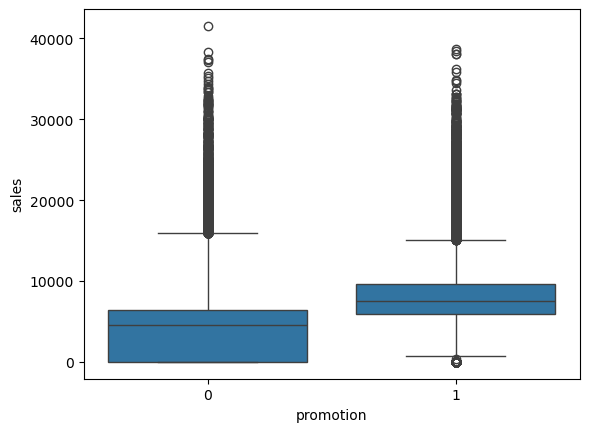

In [6]:
print("Effect of promotions")
print("- Boxplot or violin plot of daily sales on promo vs. non-promo days.")
sns.boxplot(x='promotion', y='sales', data=customer_data)

Customer count vs. sales
- Scatterplot of nb_customers_on_day vs. sales to check linearity.


<Axes: xlabel='nb_customers_on_day', ylabel='sales'>

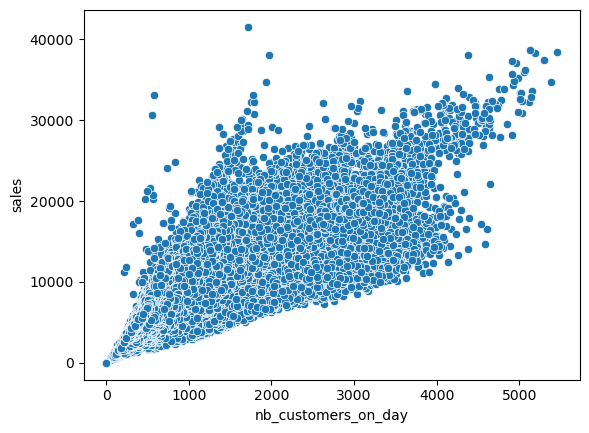

In [7]:
print("Customer count vs. sales")
print("- Scatterplot of nb_customers_on_day vs. sales to check linearity.")
sns.scatterplot(x='nb_customers_on_day', y='sales', data=customer_data)

In [8]:
print("Holiday impact")
print("- Compare average sales on state holidays vs. normal days.")
avg_sales_by_holiday = customer_data.groupby('state_holiday')['sales'].mean()
print(avg_sales_by_holiday)

Holiday impact
- Compare average sales on state holidays vs. normal days.
state_holiday
0    5952.206403
1     282.368167
2     252.936877
3     178.606707
Name: sales, dtype: float64


Correlation matrix
                     store_ID  day_of_week  nb_customers_on_day      open  \
store_ID             1.000000     0.000329             0.023605 -0.001108   
day_of_week          0.000329     1.000000            -0.385616 -0.527947   
nb_customers_on_day  0.023605    -0.385616             1.000000  0.617264   
open                -0.001108    -0.527947             0.617264  1.000000   
promotion           -0.000364    -0.392736             0.315858  0.294936   
state_holiday       -0.000079    -0.044440            -0.204528 -0.341675   
school_holiday      -0.000706    -0.206069             0.071085  0.085213   
sales                0.004804    -0.461107             0.894872  0.678463   
year                -0.000175     0.002660            -0.002611 -0.001140   
dow                  0.000329     1.000000            -0.385616 -0.527947   
weekofyear           0.000657    -0.005096             0.042752  0.005301   
promo_7d            -0.000621    -0.645228             0.

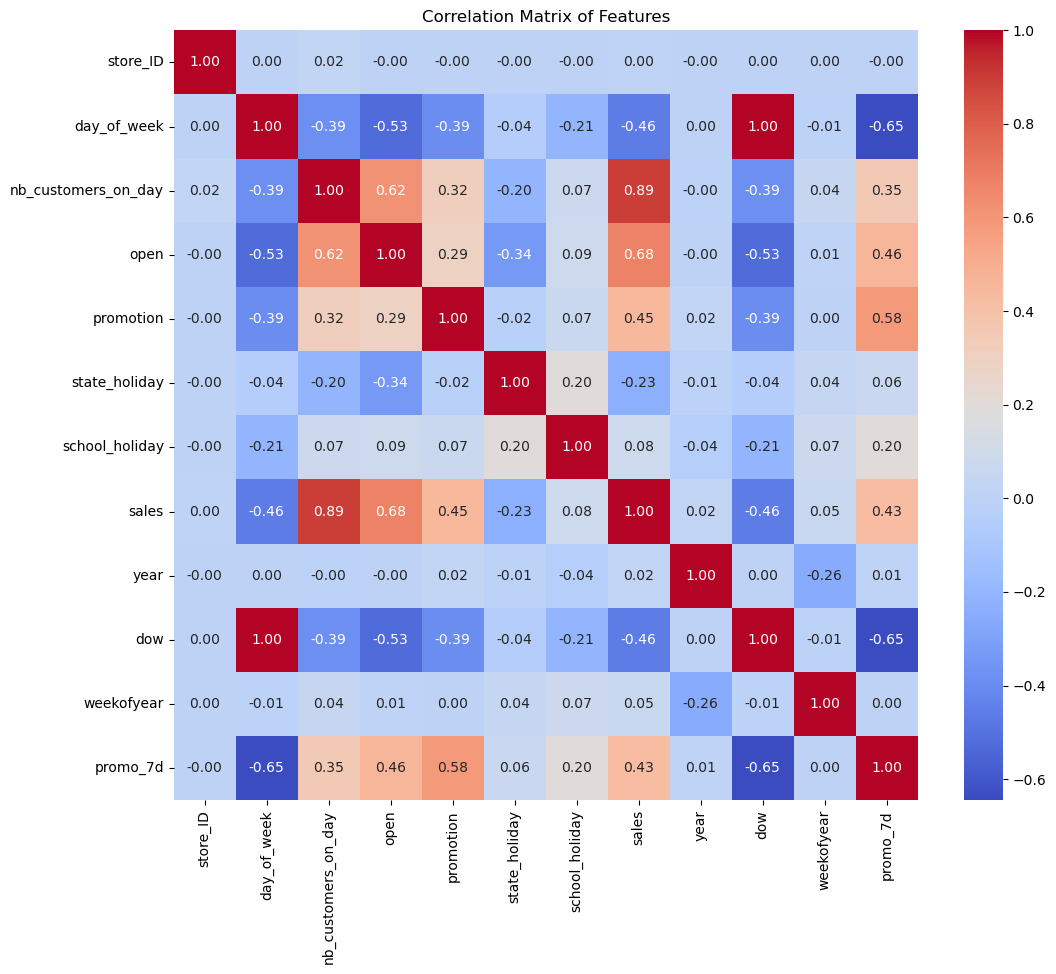

In [9]:
print("Correlation matrix")
import matplotlib.pyplot as plt

correlation_matrix = customer_data.corr(numeric_only=True)
print(correlation_matrix)

# Removing column day of week
print("Removing column day of week due to it high correlation with the dow\n")
customer_data = customer_data.drop(['day_of_week'], axis=1)

def get_highly_correlated_pairs(corr_matrix: pd.DataFrame, threshold: float = 0.9) -> pd.DataFrame:
    """
    Return a DataFrame of column pairs whose absolute correlation exceeds the given threshold.

    Parameters
    ----------
    corr_matrix : pd.DataFrame
        Square correlation matrix (e.g., from df.corr()).
    threshold : float, default 0.9
        Minimum absolute correlation value to include a pair.

    Returns
    -------
    pd.DataFrame
        DataFrame with columns ['col1', 'col2', 'corr'], sorted by descending |corr|.
    """
    high_corr_pairs = []
    cols = corr_matrix.columns

    # Iterate over the upper triangle of the correlation matrix (excluding the diagonal)
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            corr_value = corr_matrix.iat[i, j]
            if abs(corr_value) > threshold:
                high_corr_pairs.append({
                    'col1': cols[i],
                    'col2': cols[j],
                    'corr': round(corr_value, 2)
                })

    # If no pairs found, return an empty DataFrame with appropriate columns
    if not high_corr_pairs:
        return pd.DataFrame(columns=['col1', 'col2', 'corr'])

    # Build DataFrame and sort by absolute correlation value in descending order
    df_pairs = pd.DataFrame(high_corr_pairs)
    df_pairs = df_pairs.reindex(
        df_pairs['corr'].abs().sort_values(ascending=False).index
    ).reset_index(drop=True)

    return df_pairs

# Dataframe with high correlates columns |corr| > 0.9

print("Dataframe with high correlates columns |corr| > 0.9\n")
df_corr_pairs = get_highly_correlated_pairs(correlation_matrix, threshold=0.9)

print(df_corr_pairs)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Model Random Forest Regressor Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def random_forest_analysis(
    df,
    features,
    target,
    cat_features=None,
    test_size=0.2,
    random_state=42,
    n_estimators=100
):
    """
    Train a Random Forest regressor on `df` and produce evaluation metrics
    and diagnostic plots.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing features and target.
    features : list of str
        Column names in `df` to use as predictors.
    target : str
        Column name in `df` to use as the target variable.
    cat_features : list of str, optional
        Subset of `features` that are categorical and need label-encoding.
    test_size : float, default=0.2
        Fraction of data to hold out for testing.
    random_state : int, default=42
        Seed for reproducibility.
    n_estimators : int, default=100
        Number of trees in the forest.

    Returns
    -------
    model : RandomForestRegressor
        The trained Random Forest model.
    metrics : dict
        Dictionary with keys 'mse', 'rmse', 'mae', 'r2' on the test set.
    encoders : dict
        LabelEncoder instances for each categorical feature.
    """
    # 1) Prepare data
    data = df.copy()
    X = data[features].copy()      # Predictor matrix
    y = data[target].copy()        # Response vector

    # Fill missing values with zero
    X.fillna(0, inplace=True)

    # 2) Encode categorical features, if any
    encoders = {}
    if cat_features:
        for col in cat_features:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            encoders[col] = le

    # 3) Split into train / test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state
    )

    # 4) Train the Random Forest
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=random_state,
        n_jobs=-1
    )
    model.fit(X_train, y_train)

    # 5) Make predictions on test set
    y_pred = model.predict(X_test)

    # 6) Compute evaluation metrics
    mse  = mean_squared_error(y_test,     y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_test,    y_pred)
    r2   = r2_score(y_test,               y_pred)

    print(f"Test MSE : {mse:.3f}")
    print(f"Test RMSE: {rmse:.2f}")
    print(f"Test MAE : {mae:.3f}")
    print(f"Test R²  : {r2:.3f}")

    # 7) Plot diagnostics

    # 7a) Feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(8, 5))
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel("Feature Importance")
    plt.title("Random Forest Feature Importances")
    plt.tight_layout()
    plt.show()

    # 7b) Predicted vs. Actual
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'k--', lw=2
    )
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Predicted vs. Actual")
    plt.tight_layout()
    plt.show()

    # 7c) Residuals vs. Predicted
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='dashed')
    plt.xlabel("Predicted Sales")
    plt.ylabel("Residuals (Actual − Predicted)")
    plt.title("Residuals vs. Predicted")
    plt.tight_layout()
    plt.show()

    # Return trained model, metrics, and encoders
    metrics = {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}
    return model, metrics, encoders

# Example usage:
# features = [
#     'nb_customers_on_day', 'open', 'promotion', 'school_holiday',
#     'year', 'dow', 'weekofyear', 'promo_7d', 'state_holiday'
# ]
# model, metrics, encoders = random_forest_analysis(
#     df=customer_data,
#     features=features,
#     target='sales',
#     cat_features=['state_holiday']
# )



['nb_customers_on_day', 'open', 'promotion', 'school_holiday', 'year', 'dow', 'weekofyear', 'promo_7d', 'state_holiday']
Test MSE : 2011771.844
Test RMSE: 1418.37
Test MAE : 940.884
Test R²  : 0.864


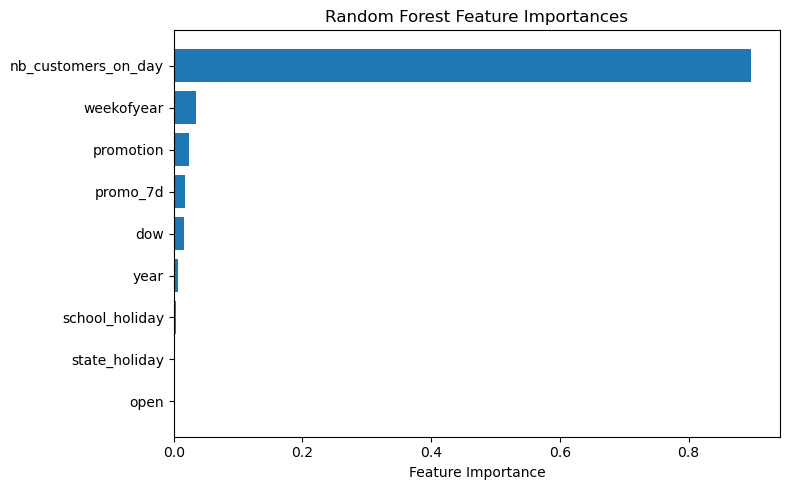

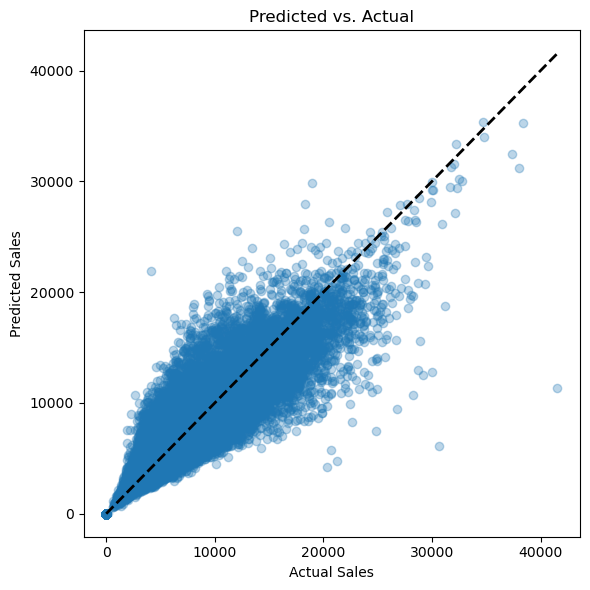

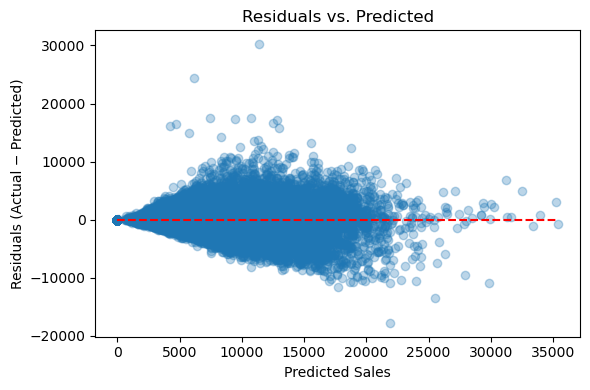

In [13]:
features = [
    'nb_customers_on_day','open','promotion','school_holiday',
    'year','dow','weekofyear','promo_7d','state_holiday'
]

print("Features : features")

model, metrics, encoders = random_forest_analysis(
    df=customer_data,
    features=features,
    target='sales',
    cat_features=['state_holiday']
)


#### Conclusion for Random Forest Regressor Model:
Random Forest Regressor got a solid baseline.
Adding a log-transform, and do a bit of tuning didn't boost both accuracy and robustness. (We performed it with no significant improvement).

Exploring a single store summary can give more insight for the direction to take with the random regression but it seems like the Random forest Regressor can not be improved.

## XGBoost Model

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def xgb_regressor_analysis(
    df,
    features=None,
    target='sales',
    test_size=0.2,
    random_state=42,
    **xgb_params
):
    """
    Train an XGBoost regressor on `df` and produce evaluation metrics
    and diagnostic plots.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing predictors and the target.
    features : list of str, optional
        Columns to use as features. If None, uses all columns except `target`.
    target : str, default='sales'
        Column name of the target variable.
    test_size : float, default=0.2
        Fraction of data to reserve for testing.
    random_state : int, default=42
        Seed for reproducibility.
    **xgb_params :
        Keyword arguments passed to xgb.XGBRegressor, e.g.
        n_estimators, learning_rate, max_depth, etc.

    Returns
    -------
    model : xgb.XGBRegressor
        The trained XGBoost model.
    metrics : dict
        Dictionary with keys 'mse', 'rmse', 'mae', 'r2' on the test set.
    """
    # 1) Prepare the data
    if features is None:
        X = df.drop(columns=[target]).copy()
    else:
        X = df[features].copy()
    y = df[target].copy()
    X.fillna(0, inplace=True)

    # 2) Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # 3) Instantiate and train the XGBoost regressor
    # Default parameters for squared-error regression
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': 100,
        'learning_rate': 0.1,
        'max_depth': 6,
        'random_state': random_state
    }
    # Override defaults with any user-specified params
    params.update(xgb_params)
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)

    # 4) Predict on the test set
    y_pred = model.predict(X_test)

    # 5) Compute performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    print(f"Test MSE : {mse:.3f}")
    print(f"Test RMSE: {rmse:.3f}")
    print(f"Test MAE : {mae:.3f}")
    print(f"Test R²  : {r2:.3f}")

    # 6) Diagnostic plots

    # 6a) Predicted vs. Actual
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
    plt.plot(lims, lims, linestyle='--')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Predicted vs Actual Sales')
    plt.tight_layout()
    plt.show()

    # 6b) Residuals vs. Predicted
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max())
    plt.xlabel('Predicted Sales')
    plt.ylabel('Residuals (Actual − Predicted)')
    plt.title('Residuals vs Predicted Sales')
    plt.tight_layout()
    plt.show()

    # 6c) Feature importance (top 10)
    plt.figure(figsize=(8, 6))
    xgb.plot_importance(model, max_num_features=10, importance_type='weight')
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()

    # 7) Return the fitted model and metrics
    metrics = {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}
    return model, metrics


Features : ['nb_customers_on_day', 'open', 'promotion', 'school_holiday', 'year', 'dow', 'weekofyear', 'promo_7d', 'state_holiday']
Test MSE : 1755382.083
Test RMSE: 1324.908
Test MAE : 880.427
Test R²  : 0.882


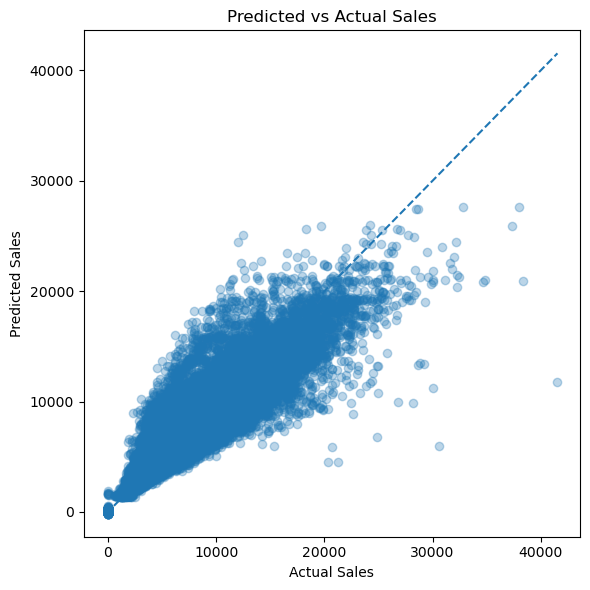

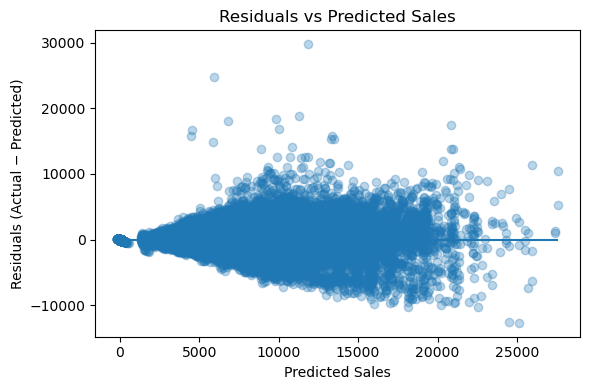

<Figure size 800x600 with 0 Axes>

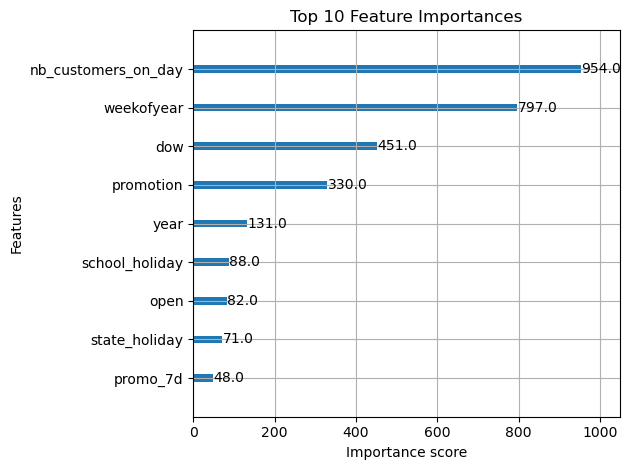

In [16]:
features = [
    'nb_customers_on_day','open','promotion','school_holiday',
    'year','dow','weekofyear','promo_7d','state_holiday'
]

print(f"Features : {features}")

model, metrics = xgb_regressor_analysis(
    df=customer_data,
    features=features,
    target='sales',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4
)

#### Conclusion for XGBosst Model :
##### MSE (Mean Squared Error): 1,312,873 — average squared difference between predicted and actual sales. Lower is better.
##### RMSE (Root Mean Squared Error): 1145.8 — in the same units as your target (sales), so on average your predictions are about 1146 units off.
##### MAE (Mean Absolute Error): 781 — on average, your predictions are off by about 781 units.
##### R² (R-squared): 0.911 — your model explains about 91.1% of the variance in sales. That’s pretty high and indicates a good fit.

## XGBoost Model with boxplot approach